In [8]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [9]:
csvpath = '../DataCleaning/Output/PopulationDensity.csv'
final_df = pd.read_csv(csvpath)
final_df

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",PopulationDensity
0,Appling,1717,142,50,9250.58,269.38,14.018288
1,Atkinson,745,108,15,8943.58,180.07,9.311241
2,Bacon,1002,73,25,8786.39,219.22,15.260078
3,Baker,151,31,6,4845.96,192.55,3.600683
4,Baldwin,3542,273,90,7972.45,202.57,67.588266
...,...,...,...,...,...,...,...
154,Whitfield,13628,660,169,13019.72,161.46,138.054912
155,Wilcox,434,66,26,4937.43,295.79,9.040133
156,Wilkes,611,61,15,6101.46,149.79,8.128280
157,Wilkinson,665,108,21,7455.99,235.45,7.802590


In [61]:
a = final_df.sort_values('Cases', ascending = False)
b = final_df.sort_values('PopulationDensity', ascending = False)
b

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",PopulationDensity
42,DeKalb,47755,3792,630,6020.90,79.43,1071.792083
32,Cobb,51668,2608,723,6535.39,91.45,846.689777
66,Gwinnett,75268,4606,754,7750.44,77.64,809.143409
30,Clayton,18253,1124,308,5987.77,101.04,759.452465
59,Fulton,69491,3830,927,6322.07,84.34,749.058522
...,...,...,...,...,...,...,...
151,Webster,90,12,3,3529.41,117.65,4.818980
49,Echols,346,11,2,8717.56,50.39,3.668092
3,Baker,151,31,6,4845.96,192.55,3.600683
130,Taliaferro,93,8,0,5698.53,0.00,3.303368


In [49]:
outliers_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = final_df['Cases'].quantile([0.25, 0.5, 0.75])
IQR = quartiles[0.75] - quartiles[0.25]

# Determine outliers using upper and lower bounds
lower_bound = quartiles[0.25] - (1.5*IQR)
upper_bound = quartiles[0.75] + (1.5*IQR)
print(f"The first quartile is {quartiles[0.25]}")
print(f"The median value is {quartiles[.5]}")
print(f"The third quartile is {quartiles[0.75]}")
print(f"The IQR value of is {IQR}")
print(f"The outliers of would be below {lower_bound}")
print(f"The outliers of would be above {upper_bound}")
print("----------------------------------------------------------\n")

# Append any outliers into the list
outliers = final_df.loc[(final_df['Cases'] > upper_bound) |
                              (final_df['Cases'] < lower_bound)]
outliers_list.append(outliers)

# Open up the list of dataframe and combine them into one big dataframe, which contains the info of the outliers
for i in range(len(outliers_list)):
    if i == 0:
        merged_outlier_list = outliers_list[0]
    else:
        merged_outlier_list = merged_outlier_list.merge(outliers_list[i], how='outer')
        
merged_outlier_list

The first quartile is 694.5
The median value is 1551.0
The third quartile is 3595.5
The IQR value of is 2901.0
The outliers of would be below -3657.0
The outliers of would be above 7947.0
----------------------------------------------------------



,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",PopulationDensity
7,Bartow,9206,605,159,8310.84,143.54,87.064314
10,Bibb,11965,1482,307,7863.95,201.77,237.623067
24,Chatham,16882,1324,299,5778.02,102.34,255.886183
27,Cherokee,18417,1045,206,6907.66,77.26,221.813709
28,Clarke,11306,403,94,8711.73,72.43,403.537333
30,Clayton,18253,1124,308,5987.77,101.04,759.452465
32,Cobb,51668,2608,723,6535.39,91.45,846.689777
35,Columbia,9843,385,125,6204.97,78.80,196.055279
42,DeKalb,47755,3792,630,6020.90,79.43,1071.792083
47,Douglas,9919,663,132,6529.70,86.90,273.692077


<AxesSubplot:>

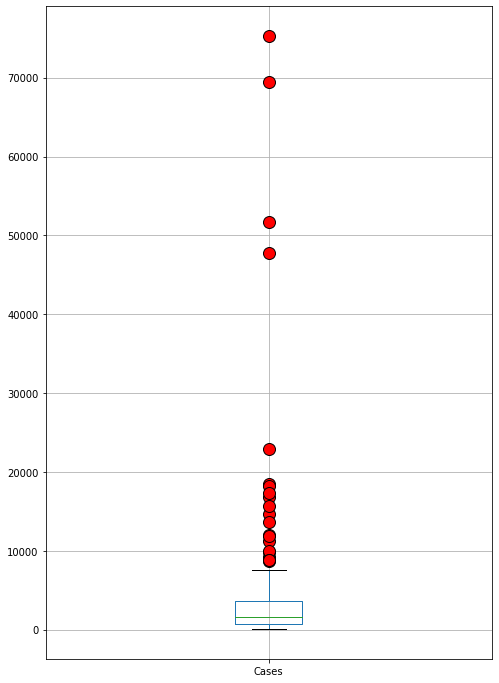

In [53]:
props = dict(markerfacecolor = 'red', markersize = 12)
final_df.boxplot('Cases', figsize=(8,12), flierprops = props)

The r-squared is 0.8020438124924306
The linear regression model is y = 57.09x + 103.89


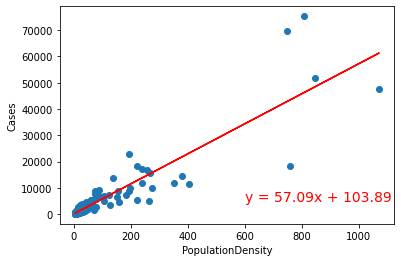

In [62]:
final_df.plot(kind='scatter', x='PopulationDensity', y='Cases')

(slope, intercept, rvalue, pvalue, stderr) = linregress(final_df['PopulationDensity'], final_df['Cases'])
regress_values = final_df['PopulationDensity'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(final_df['PopulationDensity'], final_df['Cases'])
plt.plot(final_df['PopulationDensity'],regress_values,"r-")
plt.annotate(line_eq, (600, 5000),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

The r-squared is 0.6429821505870833
The linear regression model is y = 56.26x + 1332.1


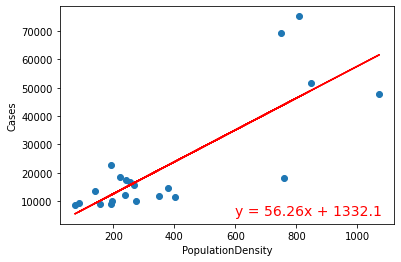

In [55]:
merged_outlier_list.plot(kind='scatter', x='PopulationDensity', y='Cases')

(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_outlier_list['PopulationDensity'], merged_outlier_list['Cases'])
regress_values = merged_outlier_list['PopulationDensity'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(merged_outlier_list['PopulationDensity'], merged_outlier_list['Cases'])
plt.plot(merged_outlier_list['PopulationDensity'],regress_values,"r-")
plt.annotate(line_eq, (600, 5000),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In [51]:
normal_df = final_df.loc[final_df['Cases'] <= upper_bound]
normal_df

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",PopulationDensity
0,Appling,1717,142,50,9250.58,269.38,14.018288
1,Atkinson,745,108,15,8943.58,180.07,9.311241
2,Bacon,1002,73,25,8786.39,219.22,15.260078
3,Baker,151,31,6,4845.96,192.55,3.600683
4,Baldwin,3542,273,90,7972.45,202.57,67.588266
...,...,...,...,...,...,...,...
153,White,2723,264,55,8574.22,173.18,46.394484
155,Wilcox,434,66,26,4937.43,295.79,9.040133
156,Wilkes,611,61,15,6101.46,149.79,8.128280
157,Wilkinson,665,108,21,7455.99,235.45,7.802590


The r-squared is 0.5984912262453342
The linear regression model is y = 33.8x + 758.55


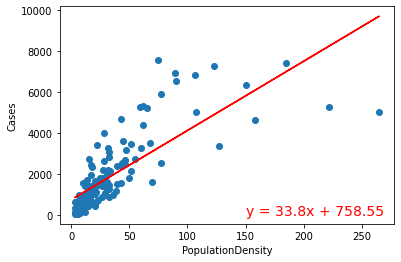

In [54]:
normal_df.plot(kind='scatter', x='PopulationDensity', y='Cases')

(slope, intercept, rvalue, pvalue, stderr) = linregress(normal_df['PopulationDensity'], normal_df['Cases'])
regress_values = normal_df['PopulationDensity'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(normal_df['PopulationDensity'], normal_df['Cases'])
plt.plot(normal_df['PopulationDensity'],regress_values,"r-")
plt.annotate(line_eq, (150, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')